In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv('/content/car_age_price.csv')

In [15]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [17]:
data.shape

(112, 2)

In [22]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


Price is the target variable.

<ipython-input-24-8e7305a7b56e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Price)


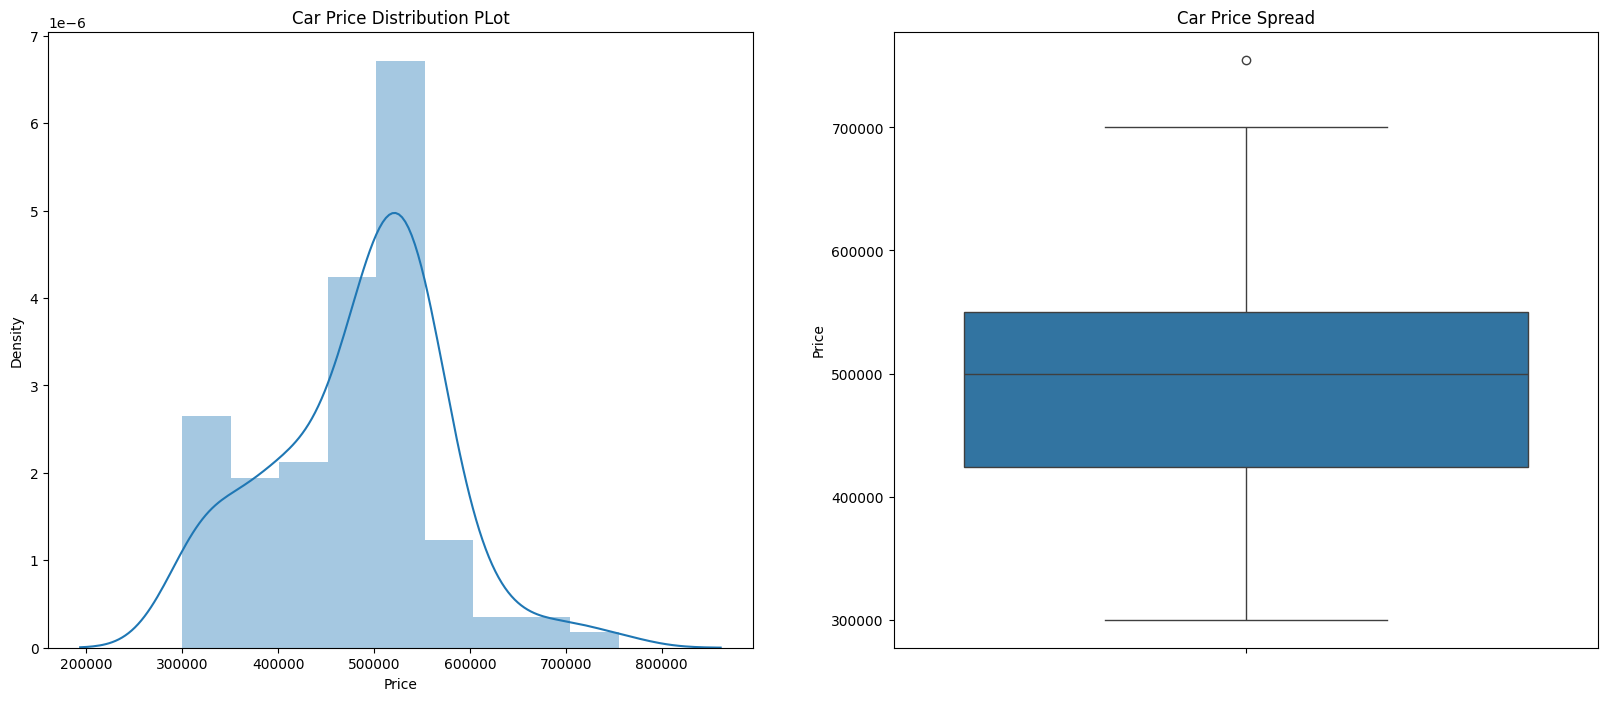

In [24]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.title('Car Price Distribution PLot')
sns.distplot(data.Price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=data.Price)
plt.show()

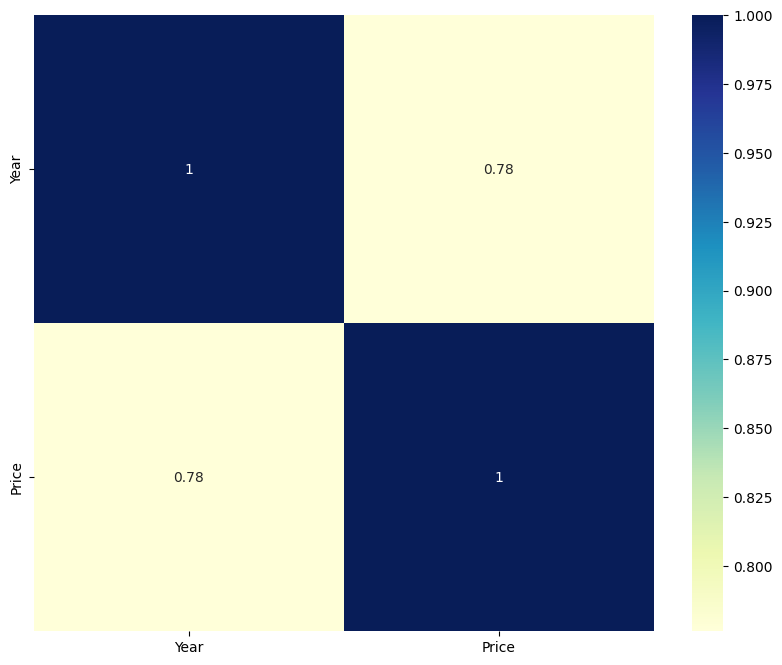

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True ,cmap="YlGnBu" )
plt.show()

In [18]:
y = data['Price']
X = data.drop(['Price'],axis=True)
#split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42, test_size=.25)



In [19]:
#linear regression
from sklearn import linear_model
lin_model = linear_model.LinearRegression()
model = lin_model.fit(X_train,y_train)
lin_predict = model.predict(X_test)
from sklearn.metrics import mean_squared_error,r2_score
print('Mean Squared Error is :',mean_squared_error(y_test,lin_predict))
print('R Squared error is :',r2_score(y_test,lin_predict))



Mean Squared Error is : 3878767151.073449
R Squared error is : 0.4347961632108023


In [20]:
#lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.1)
las_model = lasso.fit(X_train,y_train)
las_predict = las_model.predict(X_test)
from sklearn.metrics import mean_squared_error,r2_score
print('Mean Squared Error is :',mean_squared_error(y_test,las_predict))
print('R Squared error is :',r2_score(y_test,las_predict))



Mean Squared Error is : 3878764025.5442586
R Squared error is : 0.43479661865476726


In [21]:
#2022prediction
year_2022 = np.array([[2022]])
linear_price_2022 = model.predict(year_2022)
print('Predicted price for 2022 model using Linear Regression:', linear_price_2022)

Predicted price for 2022 model using Linear Regression: [740160.11937766]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Lasso is a regularization technique that reduces the model complexity by adding a penalty. The penalty minimizes the coefficient sizes and allows some of penalties to shrink to zero.

Car model that are too old will depreciate a lot can impact the demand .